<a href="https://colab.research.google.com/github/chettkulkarni/advanced_deep_learning/blob/master/Assignment2/Assignment2_PartA/Assignment2_GradientTape_LinearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GradientTape

TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually tf.Variables. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

(Source :[TensorFlow Documentation](https://www.tensorflow.org/guide/autodiff)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
  y = x**2

In [ ]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

8.0

So as demonstrated above, Differentiation of equation , y=x**2
is

> 2*x

hence when x=4, differntion is 8






# Linear Classifier with GradientTape

Lets build a linear classifier which classifies postive and negative numbers

In [ ]:
'''
1. Generate random samples - postivie and negative (purple and yellow)
2. Graph the data on x and y
3. Write linear clf
''' 
num_samples = 10000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)

In [ ]:
negative_samples

array([[ 0.4051192 ,  2.36515086],
       [ 0.31053045,  4.38106968],
       [-0.05610565,  5.08766215],
       ...,
       [ 1.18972634,  3.62748488],
       [ 0.94461977,  2.87945677],
       [ 2.00112988,  3.50724219]])

In [ ]:
positive_samples

array([[ 2.60149265,  0.53279469],
       [ 2.14273955,  1.64685104],
       [ 2.20974893,  0.02407279],
       ...,
       [ 2.40101843,  0.00491793],
       [ 2.97838769, -0.77547022],
       [ 2.00293672, -0.58752493]])

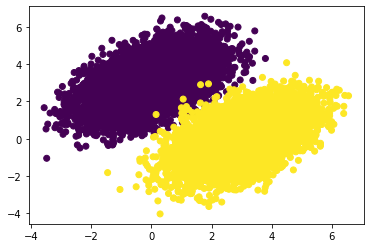

In [ ]:
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

A basic tensor flow code to perform linear classification between postive and negative numbers.


w and b are weight and bias values 

compute prediction , takes features , multiplies it with weight and adds the bias.

loss is simple mean squared error

and gradient calculation is performed using gradient tape.


In [ ]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0277
Epoch 1: last batch loss = 0.0239
Epoch 2: last batch loss = 0.0202
Epoch 3: last batch loss = 0.0260
Epoch 4: last batch loss = 0.0149
Epoch 5: last batch loss = 0.0357
Epoch 6: last batch loss = 0.0375
Epoch 7: last batch loss = 0.0237
Epoch 8: last batch loss = 0.0215
Epoch 9: last batch loss = 0.0229


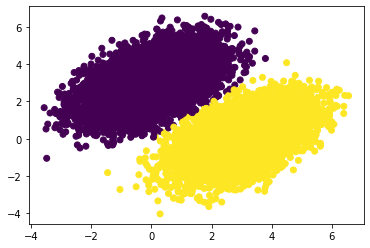

In [ ]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

Hence from above, we demonstrated simple linear classifier , where gradient was calculated using gradienttape.